We will develop a Python program that is able to implement the accelerated gradient descent methods <b>(Momentum and NAG)</b> in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from numpy.linalg import norm
from sklearn.metrics import r2_score

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [28]:
x = np.linspace(0, 20, 21)
x

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20.])

In [29]:
y = []
for x_value in x:
    y.append(-1 * x_value + 2)
y = np.array(y)
y

array([  2.,   1.,   0.,  -1.,  -2.,  -3.,  -4.,  -5.,  -6.,  -7.,  -8.,
        -9., -10., -11., -12., -13., -14., -15., -16., -17., -18.])

#### Plot your data points. 

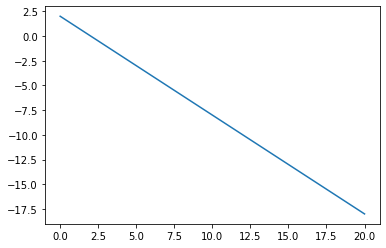

In [30]:
plt.plot(x,y)

#### Use  final version of the implemented Batch GD algorithm for single variable to find the best line filt of the given data.
#### Coose the suitable number of iterations, learning rate, and stop criteria.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph) , best fit line)

In [31]:
def Batch_GD(x_points,y_points,in_alfa,MaxIter):
    alfa = in_alfa
        
    y_actual = np.array(y_points)
    x_points = np.array(x_points)
    seta1 = 0
    seta0 = 0
    
    #assuming any value except befor using it in next while loop
    loss_diff_seta0 = 2
    loss_diff_seta1 = 2
    loss_norm = 10
    counter = 0
    j_list = []
    y_prdicted_list = []
    seta0_list = []
    seta1_list = []
    while abs(loss_norm) > .0001 and counter<MaxIter :
        y_prdicted =np.array([(seta1*x) +seta0 for x in x_points])
        y_prdicted_list.append(y_prdicted)
        seta0 = seta0 - (alfa*(1/y_actual.size)*sum((y_prdicted - y_actual)))
        seta0_list.append(seta0)
        seta1 = seta1 - (alfa*(1/y_actual.size)*sum((y_prdicted - y_actual)*x_points))
        seta1_list.append(seta1)
        
        loss = alfa*(1/(2*y_actual.size))*sum((y_prdicted - y_actual)**2)
        j_list.append(loss)
        
        loss_diff_seta0 = alfa*(1/y_actual.size)*sum((y_prdicted - y_actual))
        loss_diff_seta1 = alfa*(1/y_actual.size)*sum((y_prdicted - y_actual)*x_points)
        loss_norm = ((loss_diff_seta0**2)+(loss_diff_seta1**2))**.5

        print("end epoch",counter,seta0,seta1)
        counter +=1

    return seta0,seta1,y_prdicted,loss,j_list,y_prdicted_list,seta0_list,seta1_list

In [32]:
seta0_fi,seta1_fi,y_prdicted_fi,loss_fun,j_list,y_prdicted_list,seta0_list,seta1_list = Batch_GD(x,y,.01,5000)

print(seta0_fi,seta1_fi,y_prdicted_fi,loss_fun)

end epoch 0 -0.08 -1.1666666666666667
end epoch 1 -0.04253333333333333 -0.730888888888889
end epoch 2 -0.0490191111111111 -0.8944207407407407
end epoch 3 -0.039086845925925914 -0.8338104839506173
end epoch 4 -0.035314929071604925 -0.857027471292181
end epoch 5 -0.029259032651670774 -0.8488917676190398
end epoch 6 -0.024077265563250082 -0.8524804486078517
end epoch 7 -0.01858844804683242 -0.8516827756207961
end epoch 8 -0.013234286004284487 -0.8525241374676915
end epoch 9 -0.007849529397472493 -0.8527510543280847
end epoch 10 -0.0024959286706893 -0.853206327139955
end epoch 11 0.0028496633300130947 -0.8535747538482809
end epoch 12 0.008178642081541052 -0.8539742232552983
end epoch 13 0.013494277986255465 -0.8543606490145448
end epoch 14 0.018795400107847388 -0.8547505231599591
end epoch 15 0.024082498422764827 -0.8551376815187998
end epoch 16 0.02935544159041716 -0.8555244332853832
end epoch 17 0.03461433050305131 -0.8559099186210678
end epoch 18 0.03985917906012758 -0.8562944628892469


end epoch 373 1.240888791581948 -0.9443466062577667
end epoch 374 1.242914564291905 -0.944495123530347
end epoch 375 1.2449349310020208 -0.9446432444680632
end epoch 376 1.246949906138807 -0.9447909701285789
end epoch 377 1.2489595040902768 -0.9449383015667351
end epoch 378 1.2509637392060475 -0.945085239834558
end epoch 379 1.2529626257974429 -0.9452317859812669
end epoch 380 1.254956178137595 -0.9453779410532798
end epoch 381 1.256944410461547 -0.9455237060942235
end epoch 382 1.2589273369663538 -0.9456690821449394
end epoch 383 1.2609049718111842 -0.945814070243491
end epoch 384 1.2628773291174216 -0.9459586714251718
end epoch 385 1.2648444229687645 -0.9461028867225125
end epoch 386 1.266806267411328 -0.9462467171652885
end epoch 387 1.2687628764537437 -0.946390163780527
end epoch 388 1.270714264067259 -0.9465332275925145
end epoch 389 1.272660444185838 -0.9466759096228039
end epoch 390 1.27460143070626 -0.9468182108902224
end epoch 391 1.2765372374882198 -0.9469601324108777
end epo

end epoch 729 1.7068006369867021 -0.9785044148817721
end epoch 730 1.7075830721050123 -0.9785617782420205
end epoch 731 1.7083634192081643 -0.9786189885217604
end epoch 732 1.7091416838682587 -0.9786760461295043
end epoch 733 1.7099178716425265 -0.9787329514726744
end epoch 734 1.7106919880733686 -0.9787897049576054
end epoch 735 1.7114640386883955 -0.9788463069895482
end epoch 736 1.7122340290004663 -0.9789027579726719
end epoch 737 1.7130019645077288 -0.9789590583100669
end epoch 738 1.7137678506936582 -0.9790152084037483
end epoch 739 1.7145316930270964 -0.979071208654658
end epoch 740 1.7152934969622913 -0.9791270594626684
end epoch 741 1.7160532679389353 -0.979182761226584
end epoch 742 1.7168110113822044 -0.9792383143441461
end epoch 743 1.717566732702797 -0.9792937192120336
end epoch 744 1.7183204372969725 -0.9793489762258675
end epoch 745 1.7190721305465895 -0.9794040857802125
end epoch 746 1.719821817819145 -0.979459048268581
end epoch 747 1.7205695044678115 -0.979513864083434

end epoch 1149 1.9045561711450063 -0.9930026418677144
end epoch 1150 1.9048108736203277 -0.9930213150963387
end epoch 1151 1.9050648963937584 -0.9930399384933752
end epoch 1152 1.9053182412791583 -0.993058512191805
end epoch 1153 1.9055709100855471 -0.9930770363242539
end epoch 1154 1.9058229046171171 -0.993095511022995
end epoch 1155 1.9060742266732456 -0.9931139364199469
end epoch 1156 1.9063248780485078 -0.9931323126466773
end epoch 1157 1.9065748605326904 -0.9931506398344024
end epoch 1158 1.9068241759108038 -0.9931689181139881
end epoch 1159 1.9070728259630945 -0.9931871476159514
end epoch 1160 1.9073208124650587 -0.9932053284704606
end epoch 1161 1.9075681371874542 -0.993223460807337
end epoch 1162 1.9078148018963135 -0.9932415447560551
end epoch 1163 1.9080608083529558 -0.9932595804457445
end epoch 1164 1.9083061583140006 -0.9932775680051892
end epoch 1165 1.9085508535313795 -0.9932955075628308
end epoch 1166 1.9087948957523488 -0.9933133992467665
end epoch 1167 1.90903828671950

In [33]:
# Calculate r2 score
r2_score(y, y_prdicted_fi)

0.9999897868902591

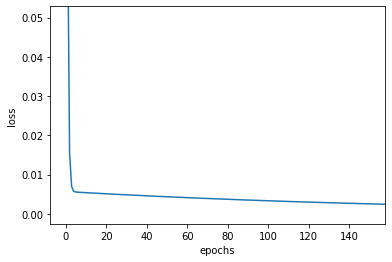

In [34]:
# Plot loss vs. epochs
plt.plot(j_list)
xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()
plt.xlim(xmin * .1, xmax * .1)
plt.ylim(ymin * .1, ymax * .1)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

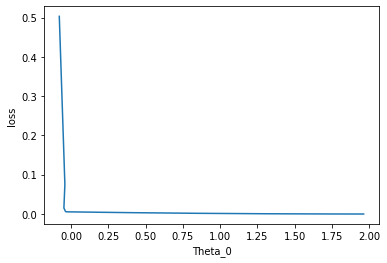

In [35]:
# Plot Theta_0 vs. loss 
plt.plot(seta0_list,j_list);
plt.xlabel('Theta_0')
plt.ylabel('loss')
plt.show()

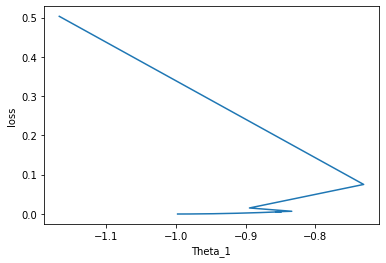

In [36]:
# Theta_1 vs. loss
plt.plot(seta1_list,j_list);
plt.xlabel('Theta_1')
plt.ylabel('loss')
plt.show()

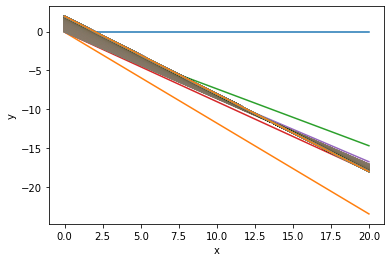

In [37]:
# Plot all regression lines till converge
for y in y_prdicted_list:
    plt.plot(x,y);
plt.xlabel('x')
plt.ylabel('y')
plt.show()

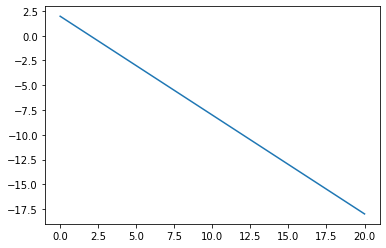

In [38]:
# Plot the best regression line
plt.plot(y_prdicted_fi)
plt.show()

### Update your Batch GD for one variable  implementation to be Momentum-Based GD and check your results

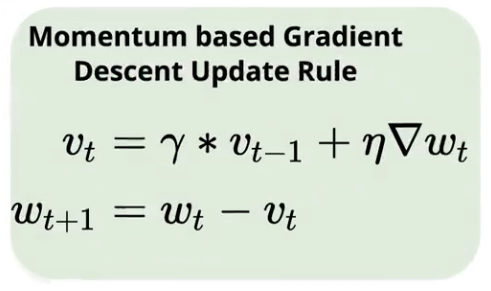

#### γ takes values between 0 and 1.
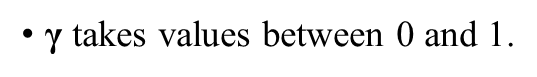

In [41]:
def Batch_MOM_GD(x_points,y_points,in_alfa,MaxIter,gama):
    alfa = .001
    Gama = gama
    y_actual = np.array(y_points)
    x_points = np.array(x_points)
    seta1 = 0
    seta0 = 0
    
    #assuming any value except zero befor using it in next while loop
    loss_diff_seta0 = 2
    loss_diff_seta1 = 2
    loss_norm = 10
    counter = 0
    j_list=[]
    y_prdicted_list = []
    seta0_list = []
    seta1_list = []
    eita0 = 0
    eita1 = 0
    
    while abs(loss_norm) > .0001 and counter<MaxIter:
        
        y_prdicted =np.array([(seta1*x) +seta0 for x in x_points])
        y_prdicted_list.append(y_prdicted)
        eita0 = Gama*eita0 + (alfa*(1/y_actual.size)*sum((y_prdicted - y_actual)))
        seta0 = seta0 - eita0
        seta0_list.append(seta0)
        eita1 = Gama*eita1 + (alfa*(1/y_actual.size)*sum((y_prdicted - y_actual)*x_points))
        seta1 = seta1 - eita1
        seta1_list.append(seta1)
        
        loss = alfa*(1/(2*y_actual.size))*sum((y_prdicted - y_actual)**2)
        j_list.append(loss)
        
        loss_diff_seta0 = alfa*(1/y_actual.size)*sum((y_prdicted - y_actual))
        loss_diff_seta1 = alfa*(1/y_actual.size)*sum((y_prdicted - y_actual)*x_points)
        loss_norm = ((loss_diff_seta0**2)+(loss_diff_seta1**2))**.5

        print("end iter",seta0,seta1)
        counter +=1

    return seta0,seta1,y_prdicted,loss,j_list,y_prdicted_list,seta0_list,seta1_list

In [42]:
seta0_fi,seta1_fi,y_prdicted_fi,loss_fun,j_list,y_prdicted_list,seta0_list,seta1_list = Batch_MOM_GD(x,y,.01,5000,.3)

print(seta0_fi,seta1_fi,y_prdicted_fi,loss_fun)

end iter -0.008009969958389328 -0.1166659357302588
end iter -0.017248261577034477 -0.2523072079302093
end iter -0.02548939868013822 -0.3750110576208876
end iter -0.03219610979456966 -0.47698174306336055
end iter -0.03741607954686024 -0.5587294184430895
end iter -0.04136733016695899 -0.6231858088045762
end iter -0.04428944989316522 -0.6736062611383193
end iter -0.04639570370814006 -0.7128959157141991
end iter -0.0478621949501717 -0.7434556822991999
end iter -0.04882969326322835 -0.7672053161412332
end iter -0.04940902986085911 -0.7856564518855013
end iter -0.0496868272498218 -0.79999058961608
end iter -0.049730543701489306 -0.8111278511454834
end iter -0.049592619540222566 -0.8197835202409989
end iter -0.04931378442828166 -0.8265131494049069
end iter -0.04892565857461136 -0.831748038954718
end iter -0.04845278472877781 -0.8358229529736959
end iter -0.04791421021895133 -0.8389976981559552
end iter -0.04732471663261421 -0.8414738965907217
end iter -0.04669577483256257 -0.843408012151019
e

end iter 0.2858301591809368 -0.8743275451155933
end iter 0.28646951417502675 -0.8743744187157095
end iter 0.2871086253878465 -0.8744212744432732
end iter 0.28774749291234797 -0.8744681123050989
end iter 0.2883861168414477 -0.8745149323079987
end iter 0.28902449726802687 -0.8745617344587822
end iter 0.28966263428493105 -0.874608518764256
end iter 0.29030052798497064 -0.8746552852312247
end iter 0.29093817846092046 -0.8747020338664898
end iter 0.29157558580552007 -0.8747487646768504
end iter 0.2922127501114736 -0.874795477669103
end iter 0.29284967147144986 -0.8748421728500416
end iter 0.2934863499780824 -0.8748888502264575
end iter 0.29412278572396927 -0.8749355098051393
end iter 0.29475897880167345 -0.8749821515928734
end iter 0.29539492930372246 -0.8750287755964431
end iter 0.29603063732260854 -0.8750753818226295
end iter 0.2966661029507887 -0.8751219702782109
end iter 0.2973013262806848 -0.8751685409699632
end iter 0.29793630740468324 -0.8752150939046596
end iter 0.2985710464151354 -

end iter 0.5879863377034383 -0.8964797891985191
end iter 0.588510482809928 -0.8965182163138957
end iter 0.5890344280638146 -0.896556628777301
end iter 0.5895581735413004 -0.8965950265943218
end iter 0.5900817193185587 -0.8966334097705425
end iter 0.5906050654717337 -0.8966717783115457
end iter 0.5911282120769407 -0.8967101322229115
end iter 0.5916511592102656 -0.8967484715102182
end iter 0.5921739069477656 -0.8967867961790419
end iter 0.592696455365469 -0.8968251062349564
end iter 0.5932188045393748 -0.8968634016835335
end iter 0.5937409545454532 -0.896901682530343
end iter 0.5942629054596453 -0.8969399487809523
end iter 0.5947846573578636 -0.8969782004409269
end iter 0.5953062103159911 -0.89701643751583
end iter 0.5958275644098823 -0.8970546600112229
end iter 0.5963487197153626 -0.8970928679326646
end iter 0.5968696763082287 -0.8971310612857121
end iter 0.5973904342642481 -0.8971692400759201
end iter 0.5979109936591596 -0.8972074043088414
end iter 0.5984313545686729 -0.897245553990026

end iter 0.828364907382236 -0.9141028766159843
end iter 0.8287973979406386 -0.9141345841801326
end iter 0.8292297235936307 -0.9141662796544241
end iter 0.8296618844040896 -0.9141979630434687
end iter 0.8300938804348685 -0.9142296343518744
end iter 0.8305257117487967 -0.9142612935842475
end iter 0.8309573784086796 -0.9142929407451923
end iter 0.8313888804772983 -0.9143245758393117
end iter 0.8318202180174105 -0.9143561988712068
end iter 0.8322513910917494 -0.9143878098454766
end iter 0.8326823997630248 -0.9144194087667188
end iter 0.8331132440939223 -0.9144509956395289
end iter 0.8335439241471035 -0.914482570468501
end iter 0.8339744399852065 -0.9145141332582274
end iter 0.8344047916708451 -0.9145456840132984
end iter 0.8348349792666095 -0.9145772227383029
end iter 0.835265002835066 -0.9146087494378278
end iter 0.8356948624387568 -0.9146402641164583
end iter 0.8361245581402005 -0.9146717667787778
end iter 0.8365540900018918 -0.9147032574293682
end iter 0.8369834580863017 -0.914734736072

end iter 1.0750310902648454 -0.9321869334005859
end iter 1.0753695288553429 -0.932211745649339
end iter 1.075707838401741 -0.9322365484373675
end iter 1.0760460189532428 -0.9322613417682787
end iter 1.0763840705590337 -0.9322861256456785
end iter 1.0767219932682794 -0.9323109000731715
end iter 1.0770597871301273 -0.9323356650543609
end iter 1.0773974521937058 -0.9323604205928485
end iter 1.0777349885081247 -0.9323851666922347
end iter 1.0780723961224752 -0.9324099033561185
end iter 1.0784096750858299 -0.9324346305880977
end iter 1.078746825447242 -0.9324593483917686
end iter 1.079083847255747 -0.932484056770726
end iter 1.0794207405603606 -0.9325087557285636
end iter 1.0797575054100808 -0.9325334452688736
end iter 1.080094141853886 -0.9325581253952469
end iter 1.080430649940737 -0.9325827961112727
end iter 1.0807670297195748 -0.9326074574205394
end iter 1.0811032812393226 -0.9326321093266335
end iter 1.0814394045488847 -0.9326567518331406
end iter 1.0817753996971464 -0.9326813849436445

end iter 1.2155735247503454 -0.9424906456329656
end iter 1.2158583755632926 -0.9425115291534234
end iter 1.2161431177647584 -0.9425324047111513
end iter 1.2164277513961554 -0.9425532723091854
end iter 1.216712276498881 -0.9425741319505606
end iter 1.216996693114316 -0.9425949836383108
end iter 1.217281001283826 -0.9426158273754688
end iter 1.2175652010487605 -0.9426366631650658
end iter 1.2178492924504534 -0.9426574910101323
end iter 1.2181332755302228 -0.9426783109136975
end iter 1.218417150329371 -0.9426991228787894
end iter 1.2187009168891847 -0.942719926908435
end iter 1.2189845752509347 -0.9427407230056598
end iter 1.2192681254558762 -0.9427615111734886
end iter 1.2195515675452482 -0.9427822914149447
end iter 1.2198349015602747 -0.9428030637330505
end iter 1.2201181275421635 -0.9428238281308268
end iter 1.220401245532107 -0.9428445846112938
end iter 1.2206842555712816 -0.9428653331774703
end iter 1.220967157700848 -0.942886073832374
end iter 1.2212499519619515 -0.9429068065790213


end iter 1.3212689793156227 -0.950239590299379
end iter 1.3215135292434452 -0.9502575192052781
end iter 1.321757985926212 -0.9502754412750198
end iter 1.3220023493994768 -0.9502933565112106
end iter 1.3222466196987794 -0.9503112649164559
end iter 1.3224907968596467 -0.9503291664933605
end iter 1.3227348809175914 -0.950347061244528
end iter 1.3229788719081133 -0.9503649491725608
end iter 1.323222769866698 -0.9503828302800605
end iter 1.3234665748288181 -0.950400704569628
end iter 1.3237102868299322 -0.9504185720438627
end iter 1.323953905905486 -0.9504364327053634
end iter 1.324197432090911 -0.9504542865567276
end iter 1.3244408654216253 -0.950472133600552
end iter 1.3246842059330342 -0.9504899738394323
end iter 1.3249274536605289 -0.9505078072759632
end iter 1.325170608639487 -0.9505256339127383
end iter 1.325413670905273 -0.9505434537523502
end iter 1.3256566404932377 -0.9505612667973907
end iter 1.3258995174387185 -0.9505790730504506
end iter 1.326142301777039 -0.9505968725141197
end

end iter 1.4232341130471444 -0.9577150506438069
end iter 1.4234397844332345 -0.957730129212671
end iter 1.4236453773983657 -0.9577452020321896
end iter 1.4238508919724393 -0.957760269104555
end iter 1.424056328185345 -0.9577753304319587
end iter 1.4242616860669617 -0.957790386016591
end iter 1.4244669656471562 -0.9578054358606417
end iter 1.4246721669557845 -0.9578204799662996
end iter 1.424877290022691 -0.9578355183357526
end iter 1.4250823348777084 -0.9578505509711881
end iter 1.4252873015506584 -0.9578655778747922
end iter 1.4254921900713513 -0.9578805990487506
end iter 1.425697000469586 -0.9578956144952478
end iter 1.42590173277515 -0.9579106242164678
end iter 1.4261063870178194 -0.9579256282145935
end iter 1.426310963227359 -0.9579406264918071
end iter 1.4265154614335223 -0.9579556190502899
end iter 1.4267198816660513 -0.9579706058922225
end iter 1.4269242239546769 -0.9579855870197845
end iter 1.4271284883291184 -0.9580005624351549
end iter 1.427332674819084 -0.9580155321405115
en

end iter 1.5426240053640674 -0.9664679877790696
end iter 1.542784154278495 -0.9664797289185669
end iter 1.5429442421293411 -0.9664914655812558
end iter 1.5431042689398888 -0.966503197768843
end iter 1.5432642347334125 -0.966514925483035
end iter 1.5434241395331771 -0.9665266487255374
end iter 1.5435839833624394 -0.9665383674980552
end iter 1.5437437662444469 -0.9665500818022928
end iter 1.5439034882024383 -0.966561791639954
end iter 1.5440631492596435 -0.9665734970127419
end iter 1.5442227494392835 -0.9665851979223588
end iter 1.5443822887645704 -0.9665968943705064
end iter 1.5445417672587076 -0.966608586358886
end iter 1.5447011849448897 -0.966620273889198
end iter 1.5448605418463022 -0.9666319569631423
end iter 1.5450198379861217 -0.966643635582418
end iter 1.5451790733875164 -0.9666553097487236
end iter 1.545338248073645 -0.966666979463757
end iter 1.5454973620676582 -0.9666786447292155
end iter 1.5456564153926973 -0.9666903055467957
end iter 1.5458154080718949 -0.9667019619181935
e

In [43]:
# Calculate r2 score
r2_score(y, y_prdicted_fi)

0.9989730197531677

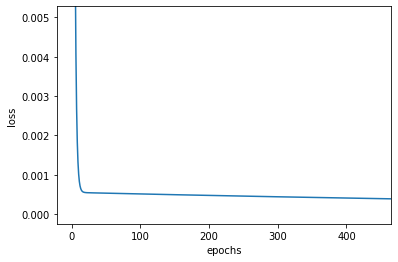

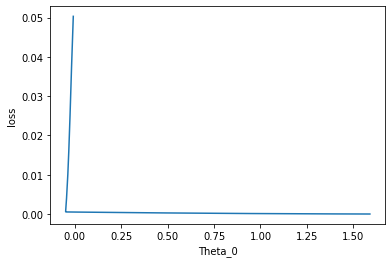

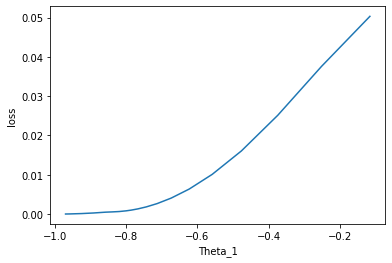

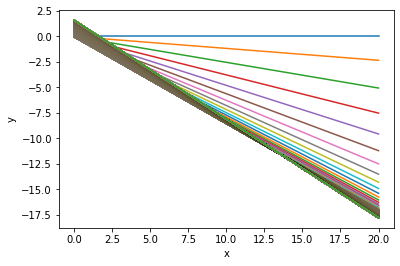

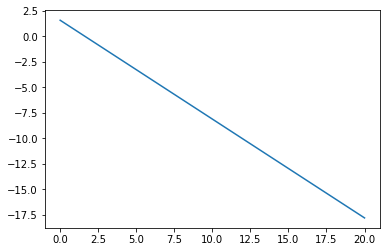

In [44]:
# Plot loss vs. epochs
plt.plot(j_list)
xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()
plt.xlim(xmin * .1, xmax * .1)
plt.ylim(ymin * .1, ymax * .1)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

# Plot Theta_0 vs. loss 
plt.plot(seta0_list,j_list);
plt.xlabel('Theta_0')
plt.ylabel('loss')
plt.show()

# Theta_1 vs. loss
plt.plot(seta1_list,j_list);
plt.xlabel('Theta_1')
plt.ylabel('loss')
plt.show()

# Plot all regression lines till converge
for y in y_prdicted_list:
    plt.plot(x,y);
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Plot the best regression line
plt.plot(y_prdicted_fi)
plt.show()

#### Try another values of momentum term and check your reults.
#### Try very large values close to one and very small values close to zero. 
#### Try momentum = 0

In [64]:
seta0_fi,seta1_fi,y_prdicted_fi,loss_fun,j_list,y_prdicted_list,seta0_list,seta1_list = Batch_MOM_GD(x,y,.01,5000,.01)

print(seta0_fi,seta1_fi,y_prdicted_fi,loss_fun)

end iter -0.008408818097196926 -0.11663669266662581
end iter -0.015726948630602366 -0.21841531608117376
end iter -0.022009067923691006 -0.30606243229787866
end iter -0.02739807382291634 -0.3815269730333912
end iter -0.03201811417494869 -0.44650231072124624
end iter -0.035976091454278526 -0.5024465931577642
end iter -0.039364047301236826 -0.5506152666693179
end iter -0.04226122824290892 -0.5920892524865735
end iter -0.04473586439641392 -0.6277992082224444
end iter -0.04684670090852504 -0.6585464166787307
end iter -0.04864431650314724 -0.6850207708080743
end iter -0.0501722587317065 -0.707816258507192
end iter -0.05146802140738539 -0.7274442948008424
end iter -0.0525638861619233 -0.7443452006602157
end iter -0.05348764701390152 -0.7588980861002532
end iter -0.05426323421160179 -0.7714293593841058
end iter -0.05491125135272306 -0.7822200533256264
end iter -0.05544943783672221 -0.7915121331303046
end iter -0.05589306702961936 -0.7995139273554683
end iter -0.05625528907816096 -0.80640480388

end iter 0.0004996290144040689 -0.8534088404873398
end iter 0.0006256603462025372 -0.8534180803342221
end iter 0.0007516577053196156 -0.853427317690435
end iter 0.0008776211009128926 -0.8534365525566501
end iter 0.001003550542137489 -0.8534457849335383
end iter 0.0011294460381460559 -0.8534550148217708
end iter 0.001255307598088779 -0.8534642422220183
end iter 0.0013811352311133766 -0.8534734671349516
end iter 0.0015069289463651011 -0.8534826895612412
end iter 0.0016326887529867409 -0.8534919095015573
end iter 0.0017584146601186189 -0.85350112695657
end iter 0.0018841066768985944 -0.8535103419269492
end iter 0.0020097648124620627 -0.8535195544133647
end iter 0.0021353890759419577 -0.8535287644164861
end iter 0.002260979476468751 -0.8535379719369828
end iter 0.0023865360231704533 -0.853547176975524
end iter 0.0025120587251726153 -0.8535563795327786
end iter 0.0026375475915983255 -0.8535655796094157
end iter 0.0027630026315682166 -0.8535747772061038
end iter 0.0028884238542004606 -0.8535

end iter 0.056919272163321204 -0.8575451838585653
end iter 0.05703009516133896 -0.8575533087233755
end iter 0.05714088828619463 -0.8575614313980682
end iter 0.05725165154594075 -0.8575695518832336
end iter 0.057362384948627686 -0.8575776701794618
end iter 0.05747308850230362 -0.8575857862873432
end iter 0.057583762215014586 -0.8575939002074673
end iter 0.05769440609480443 -0.857602011940424
end iter 0.05780502014971484 -0.8576101214868028
end iter 0.057915604387785334 -0.8576182288471932
end iter 0.05802615881705326 -0.8576263340221844
end iter 0.058136683445553804 -0.8576344370123654
end iter 0.058247178281319985 -0.8576425378183253
end iter 0.05835764333238266 -0.8576506364406529
end iter 0.05846807860677051 -0.8576587328799365
end iter 0.05857848411251006 -0.8576668271367649
end iter 0.05868885985762567 -0.8576749192117262
end iter 0.058799205850139535 -0.8576830091054086
end iter 0.058909522098071695 -0.8576910968184002
end iter 0.05901980860944002 -0.8576991823512886
end iter 0.05

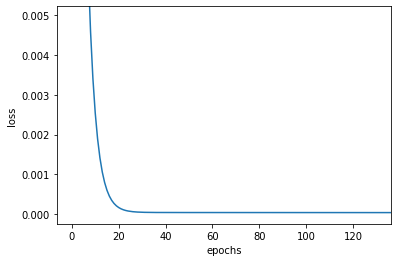

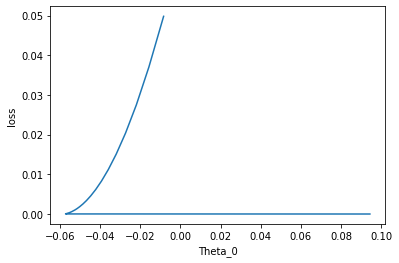

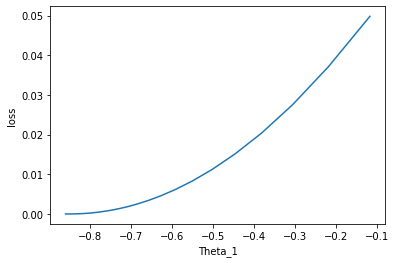

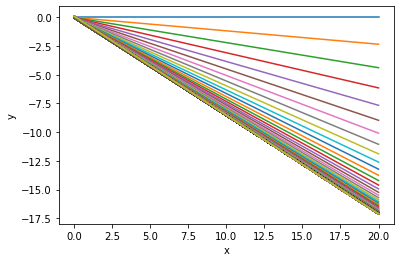

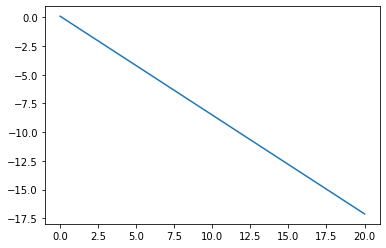

In [65]:
# Plot loss vs. epochs
plt.plot(j_list)
xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()
plt.xlim(xmin * .1, xmax * .1)
plt.ylim(ymin * .1, ymax * .1)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

# Plot Theta_0 vs. loss 
plt.plot(seta0_list,j_list);
plt.xlabel('Theta_0')
plt.ylabel('loss')
plt.show()

# Theta_1 vs. loss
plt.plot(seta1_list,j_list);
plt.xlabel('Theta_1')
plt.ylabel('loss')
plt.show()

# Plot all regression lines till converge
for y in y_prdicted_list:
    plt.plot(x,y);
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Plot the best regression line
plt.plot(y_prdicted_fi)
plt.show()

### Update your Batch GD for one variable  implementation to be NAG and check your results

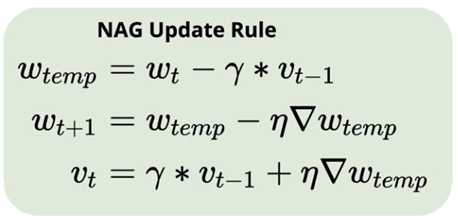

In [60]:
def Batch_NAG(x_points,y_points,in_alfa,MaxIter,gama):
    alfa = .001
    Gama = gama
    y_actual = np.array(y_points)
    x_points = np.array(x_points)
    
    #assuming any value except zero befor using it in next while loop
    loss_diff_seta0 = 2
    loss_diff_seta1 = 2
    loss_norm = 10
    j_list=[]
    y_prdicted_list = []
    seta0_list = []
    seta1_list = []
    seta1 = 0
    seta0 = 0
    eita0 = 0
    eita1 = 0
    setaTemp0 = 0
    counter = 0
    
    while abs(loss_norm) > .0001 and counter<MaxIter:
        
        y_prdicted =np.array([(seta1*x) +setaTemp0 for x in x_points])
        y_prdicted_list.append(y_prdicted)
        
        setaTemp0 = seta0 - Gama*eita0
        seta0 = setaTemp0 - (alfa*(1/y_actual.size)*sum((y_prdicted - y_actual)))
        eita0 = Gama*eita0 + (alfa*(1/y_actual.size)*sum((y_prdicted - y_actual)))
        seta0_list.append(seta0)
        
        setaTemp1 = seta1 - Gama*eita1
        seta1 = setaTemp1 - (alfa*(1/y_actual.size)*sum((y_prdicted - y_actual)*x_points))
        eita1 = Gama*eita1 + (alfa*(1/y_actual.size)*sum((y_prdicted - y_actual)*x_points))
        seta1_list.append(seta1)
        
        loss = alfa*(1/(2*y_actual.size))*sum((y_prdicted - y_actual)**2)
        j_list.append(loss)
        
        loss_diff_seta0 = alfa*(1/y_actual.size)*sum((y_prdicted - y_actual))
        loss_diff_seta1 = alfa*(1/y_actual.size)*sum((y_prdicted - y_actual)*x_points)
        loss_norm = ((loss_diff_seta0**2)+(loss_diff_seta1**2))**.5

        print("end iter",seta0,seta1)
        counter +=1

    return seta0,seta1,y_prdicted,loss,j_list,y_prdicted_list,seta0_list,seta1_list

In [61]:
seta0_fi,seta1_fi,y_prdicted_fi,loss_fun,j_list,y_prdicted_list,seta0_list,seta1_list = Batch_NAG(x,y,.001,5000,.4)

print(seta0_fi,seta1_fi,y_prdicted_fi,loss_fun)

end iter -0.008309104287188264 -0.11664400502972662
end iter -0.018775410238954567 -0.2640042647172812
end iter -0.02861936151367448 -0.40339546331731396
end iter -0.036809129744957904 -0.5204356151408241
end iter -0.04315722823122773 -0.6124439107438066
end iter -0.04784104776844839 -0.6817897158426979
end iter -0.05116008624447221 -0.7325371504038882
end iter -0.05342171984244778 -0.7688695729470596
end iter -0.054894294137720796 -0.7944428283416077
end iter -0.055793673486320555 -0.8121990185896508
end iter -0.05628505600319639 -0.8243901339394507
end iter -0.05649065853251472 -0.8326823992184481
end iter -0.056498698230235886 -0.8382785663764863
end iter -0.05637165983320351 -0.8420305718691994
end iter -0.056153141128777506 -0.8445328484661273
end iter -0.05587318860505971 -0.8461950663995105
end iter -0.05555229548511874 -0.8472966421915205
end iter -0.05520431489481984 -0.8480264576959209
end iter -0.054838538430692196 -0.8485112003265938
end iter -0.054461155006304766 -0.848835

end iter 0.11273367020528333 -0.8616228686496425
end iter 0.11305807549432231 -0.8616466584262549
end iter 0.113382336416919 -0.8616704376159701
end iter 0.11370645303731917 -0.8616942062234997
end iter 0.11403042541974001 -0.8617179642535526
end iter 0.11435425362837014 -0.8617417117108364
end iter 0.11467793772736957 -0.8617654486000559
end iter 0.11500147778086983 -0.8617891749259142
end iter 0.11532487385297384 -0.8618128906931123
end iter 0.11564812600775602 -0.8618365959063489
end iter 0.1159712343092623 -0.8618602905703205
end iter 0.1162941988215101 -0.8618839746897221
end iter 0.1166170196084883 -0.8619076482692459
end iter 0.11693969673415737 -0.8619313113135826
end iter 0.11726223026244928 -0.8619549638274204
end iter 0.11758462025726757 -0.8619786058154456
end iter 0.11790686678248731 -0.8620022372823424
end iter 0.11822896990195518 -0.8620258582327928
end iter 0.11855092967948941 -0.862049468671477
end iter 0.11887274617887986 -0.8620730686030729
end iter 0.119194419463888

end iter 0.25662611656175244 -0.8721750059626944
end iter 0.2568864870114858 -0.8721940998401523
end iter 0.25714674159148226 -0.8722131852204764
end iter 0.25740688035330594 -0.872232262107448
end iter 0.2576669033484982 -0.8722513305048468
end iter 0.25792681062857725 -0.8722703904164509
end iter 0.25818660224503853 -0.8722894418460366
end iter 0.2584462782493545 -0.8723084847973785
end iter 0.2587058386929748 -0.8723275192742498
end iter 0.2589652836273261 -0.8723465452804217
end iter 0.2592246131038122 -0.8723655628196635
end iter 0.2594838271738139 -0.8723845718957436
end iter 0.25974292588868936 -0.8724035725124281
end iter 0.26000190929977374 -0.8724225646734814
end iter 0.26026077745837944 -0.8724415483826666
end iter 0.2605195304157959 -0.8724605236437449
end iter 0.26077816822328986 -0.8724794904604759
end iter 0.2610366909321052 -0.8724984488366175
end iter 0.26129509859346295 -0.8725173987759258
end iter 0.2615533912585614 -0.8725363402821555
end iter 0.2618115689785761 -0.

end iter 0.3789627353040785 -0.8811463789017953
end iter 0.37916866366236984 -0.8811614803499142
end iter 0.37937450037867676 -0.8811765750776052
end iter 0.3795802454937816 -0.8811916630878589
end iter 0.37978589904844867 -0.8812067443836651
end iter 0.3799914610834241 -0.8812218189680114
end iter 0.3801969316394358 -0.8812368868438849
end iter 0.38040231075719366 -0.8812519480142708
end iter 0.3806075984773894 -0.8812670024821531
end iter 0.3808127948406967 -0.8812820502505146
end iter 0.38101789988777096 -0.8812970913223369
end iter 0.38122291365924976 -0.8813121257005999
end iter 0.3814278361957524 -0.8813271533882824
end iter 0.38163266753788017 -0.8813421743883618
end iter 0.38183740772621627 -0.8813571887038143
end iter 0.38204205680132586 -0.8813721963376147
end iter 0.382246614803756 -0.8813871972927363
end iter 0.38245108177403575 -0.8814021915721513
end iter 0.38265545775267623 -0.8814171791788306
end iter 0.3828597427801703 -0.8814321601157435
end iter 0.383063936896993 -0.

In [62]:
# Calculate r2 score
r2_score(y, y_prdicted_fi)

0.9987799874512813

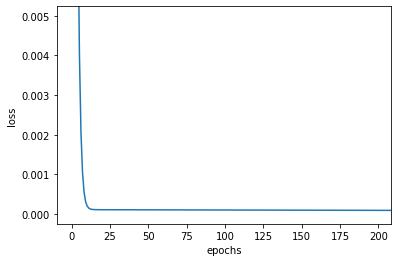

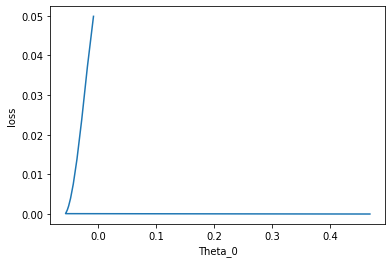

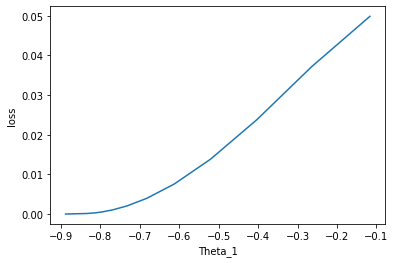

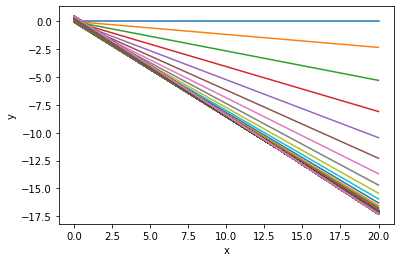

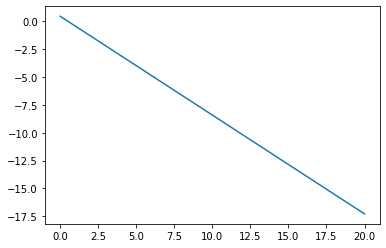

In [63]:
# Plot loss vs. epochs
plt.plot(j_list)
xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()
plt.xlim(xmin * .1, xmax * .1)
plt.ylim(ymin * .1, ymax * .1)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

# Plot Theta_0 vs. loss 
plt.plot(seta0_list,j_list);
plt.xlabel('Theta_0')
plt.ylabel('loss')
plt.show()

# Theta_1 vs. loss
plt.plot(seta1_list,j_list);
plt.xlabel('Theta_1')
plt.ylabel('loss')
plt.show()

# Plot all regression lines till converge
for y in y_prdicted_list:
    plt.plot(x,y);
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Plot the best regression line
plt.plot(y_prdicted_fi)
plt.show()

## Congratulations 
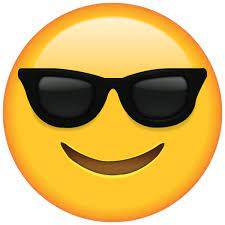